In [6]:
%pip install pysd==3.7.1 -q
%pip install netCDF4==1.6.1 -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pysd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Loading the model
model = pysd.read_vensim("./SFD_Group.mdl")

In [9]:
# Running the model
values = model.run()
values.head(5)

/Users/atanasyonkov/Documents/Documents/msc-is-is/modelling-system-dynamics/project/MSD-Group-1/Stochasticity/SFD_Group.py:202: RuntimeWarning: overflow encountered in exp
  lambda: 1 / (1 + np.exp(-k() * (divorced() / population()))),
/Users/atanasyonkov/Documents/Documents/msc-is-is/modelling-system-dynamics/project/MSD-Group-1/Stochasticity/SFD_Group.py:202: RuntimeWarning: overflow encountered in exp
  lambda: 1 / (1 + np.exp(-k() * (divorced() / population()))),
/Users/atanasyonkov/Documents/Documents/msc-is-is/modelling-system-dynamics/project/MSD-Group-1/Stochasticity/SFD_Group.py:202: RuntimeWarning: overflow encountered in exp
  lambda: 1 / (1 + np.exp(-k() * (divorced() / population()))),
/Users/atanasyonkov/Documents/Documents/msc-is-is/modelling-system-dynamics/project/MSD-Group-1/Stochasticity/SFD_Group.py:202: RuntimeWarning: overflow encountered in exp
  lambda: 1 / (1 + np.exp(-k() * (divorced() / population()))),
/Users/atanasyonkov/Documents/Documents/msc-is-is/modell

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Economic factor,Delay for societal,K,shock seed,Scaled divorce,Marriage rate,...,Recovery,Divorced,Unmarried,Marriage,Married,Recovery rate,Divorce rate,Education,W eco,W soc
1992.00,2018,1992,0.25,0.25,1.375531,-0.262355,2.993,1,488.053685,0.114151,...,61576.970000,3.017000e+07,4.179500e+07,4.770928e+06,1.132950e+08,0.002041,0.798065,0.9,1.134000e-17,0.3634
1992.25,2018,1992,0.25,0.25,1.375531,-0.262355,2.993,1,395.817056,0.114151,...,61576.970000,5.275881e+07,4.061766e+07,4.636534e+06,9.188353e+07,0.002041,0.798065,0.9,1.134000e-17,0.3634
1992.50,2018,1992,0.25,0.25,1.375531,-0.262355,2.993,1,321.838407,0.114151,...,65418.950472,7.107568e+07,3.947392e+07,4.505976e+06,7.471039e+07,0.002041,0.798065,0.9,1.134000e-17,0.3634
1992.75,2018,1992,0.25,0.25,1.375531,-0.262355,2.993,1,262.479104,0.114151,...,72056.160668,8.596528e+07,3.836378e+07,4.379253e+06,6.093094e+07,0.002041,0.798065,0.9,1.134000e-17,0.3634
1993.00,2018,1992,0.25,0.25,1.375531,-0.262355,2.993,1,28.427255,0.685802,...,80672.741297,9.810398e+07,3.728698e+07,2.557149e+07,4.986903e+07,0.002041,0.105605,0.9,1.134000e-17,0.3634


In [10]:
list(values)

['FINAL TIME',
 'INITIAL TIME',
 'SAVEPER',
 'TIME STEP',
 'Economic factor',
 'Delay for societal',
 'K',
 'shock seed',
 'Scaled divorce',
 'Marriage rate',
 'Divorce',
 'Societal factor',
 'Population',
 'Delay for recovery',
 'Recovery',
 'Divorced',
 'Unmarried',
 'Marriage',
 'Married',
 'Recovery rate',
 'Divorce rate',
 'Education',
 'W eco',
 'W soc']

Text(0.5, 1.0, 'Stochasticity Delay for Societal')

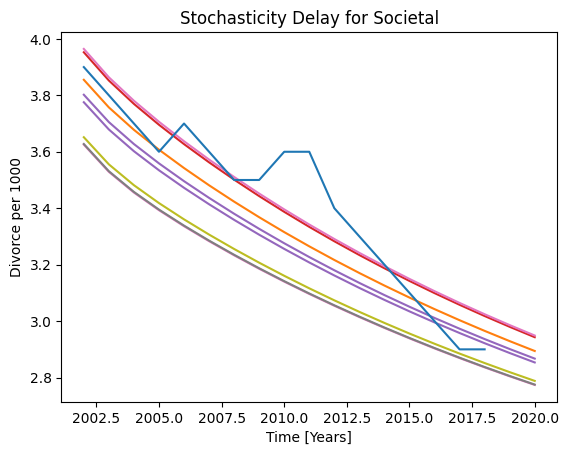

In [21]:
# Plot several time series with different seeds
original = pd.read_csv(r'./US.csv', sep=',', index_col='Year')

import warnings
warnings.filterwarnings("ignore")

seed_values = np.arange(20)
output = [
    model.run(
        params={
            "shock seed": seed_value,
        },
        return_columns=["Divorce", "Population"],
        return_timestamps=np.arange(2002, 2021, 1),
    )
    for seed_value in seed_values
]

# np.arange(2002, 2019, 1)
# print(output[data].index)

for data in range(len(output)):
    # print(output[data].index)
    plt.plot(
        output[data].index,
        output[data]["Divorce"] / output[data]["Population"] * 1000,
        label="Simulated",
    )
plt.plot(original.index, original['United States'], label='Historical')

plt.xlabel("Time [Years]")
plt.ylabel("Divorce per 1000")
plt.title("Stochasticity Delay for Societal")

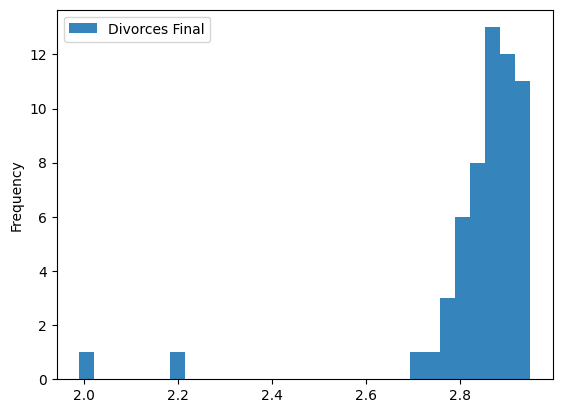

In [ ]:
seed_values = np.arange(0, 100)

divorces_outcome = [
    model.run(
        params={
            "shock seed": seed_value,
        },
        return_columns=["Divorce", "Population"],
    ).iloc[-1]
    for seed_value in seed_values
]

# Convert the list of DataFrames to a single DataFrame
divorces_outcome_df = pd.concat(divorces_outcome, axis=1).T

divorce_outputs = pd.DataFrame(
    {
        "Divorces Final": divorces_outcome_df["Divorce"]
        / divorces_outcome_df["Population"]
        * 1000
    }
)

hist = divorce_outputs.plot.hist(bins=30, alpha=0.9)
plt.show()
